In [ ]:
import pandas as pd

# Load the dataset to see the first few rows and understand its structure
file_path = '/content/AB_NYC_2019.csv'
df = pd.read_csv(file_path)
df.head()

# Check for missing values in the dataset
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Identifying missing data
missing_data = df.isnull()

# Summarizing missing data by column
missing_summary = df.isnull().sum()

# Display the summary of missing data
print(missing_summary)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Replace null values
df_filled = df.fillna({'name': 'unknown', 'host_name': 'unknown','reviews_per_month':0},inplace=True)
df['last_review'].fillna(method='ffill', inplace=True)

In [ ]:
# Summarizing missing data by column
missing_summary = df.isnull().sum()

# Display the summary of missing data
print(missing_summary)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


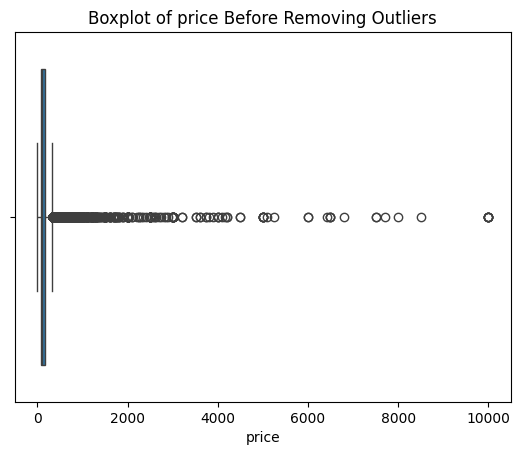

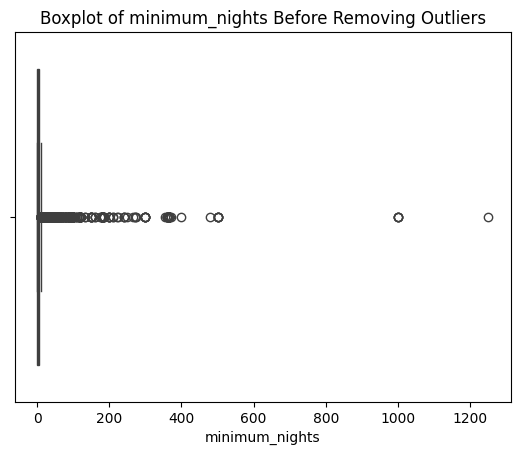

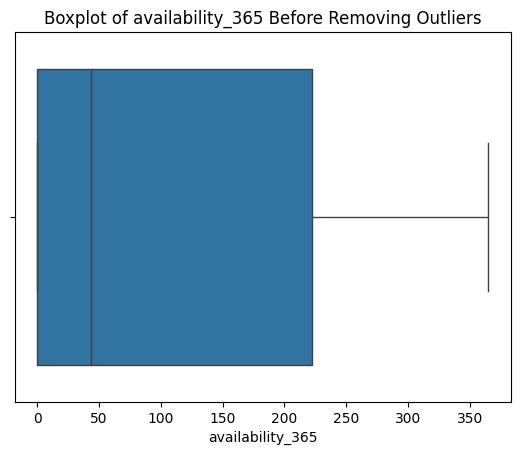

Original data size: 48895 rows
New data size after outlier removal: 47542 rows
Number of rows removed: 1353


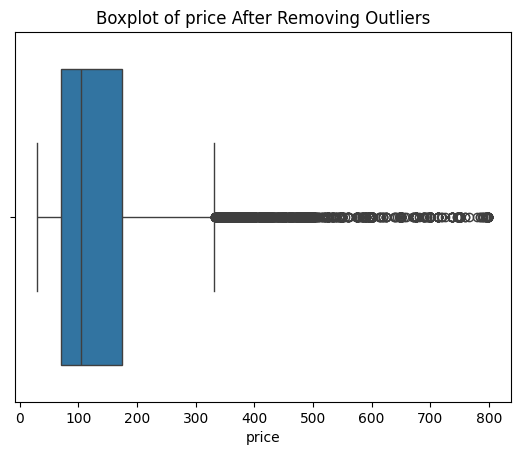

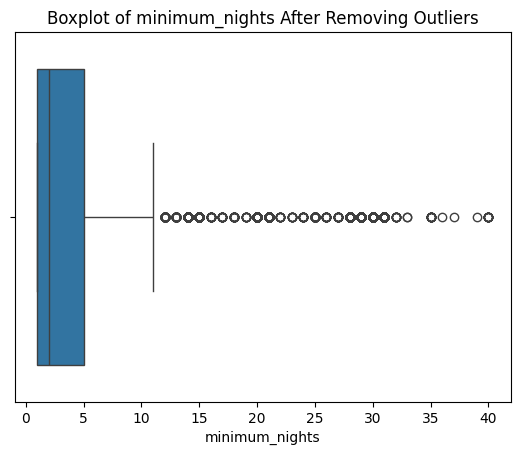

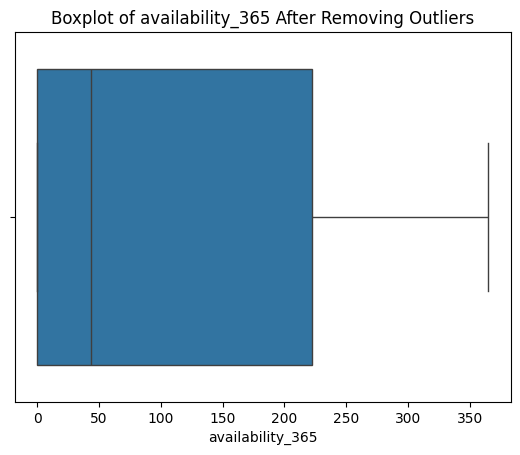

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Store the original data size
original_data_size = df.shape[0]

# Correcting column names for consistent access
df.columns = df.columns.str.strip()

# Define a function to visualize outliers
def visualize_outliers(df, column_name):
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name} Before Removing Outliers')
    plt.show()

# Define a function to remove outliers using Quantile-Based Outlier Removal
def remove_outliers_quantile(df, column_name, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)

    # Filtering out the outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# Visualize and remove outliers for specific columns
columns_to_check = ['price', 'minimum_nights','availability_365']
for column in columns_to_check:
    visualize_outliers(df, column)
    df = remove_outliers_quantile(df, column)

# Store the new data size after outlier removal
new_data_size = df.shape[0]

# Displaying the shape of the DataFrame before and after outlier removal
print(f"Original data size: {original_data_size} rows")
print(f"New data size after outlier removal: {new_data_size} rows")
print(f"Number of rows removed: {original_data_size - new_data_size}")

# You might want to visualize the columns again after outlier removal to confirm the changes.
for column in columns_to_check:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} After Removing Outliers')
    plt.show()

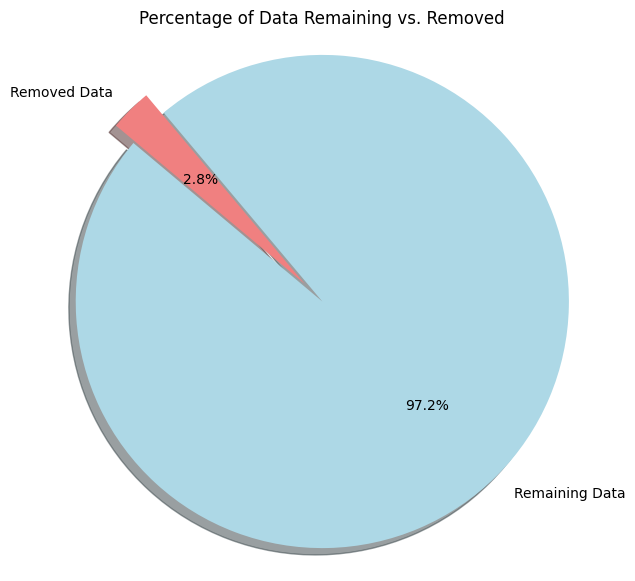

In [ ]:

# Calculate the percentage of data remaining
percentage_remaining = (new_data_size / original_data_size) * 100

# Calculate the percentage of data removed
percentage_removed = 100 - percentage_remaining

# Data to plot
labels = 'Remaining Data', 'Removed Data'
sizes = [percentage_remaining, percentage_removed]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Remaining Data')

# Plot
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Data Remaining vs. Removed')
plt.show()

In [ ]:
df.groupby('neighbourhood_group').price.agg(['mean', 'min', 'max'])

,mean,min,max
neighbourhood_group,,,
Bronx,87.116552,30,680
Brooklyn,116.907502,30,795
Manhattan,173.469479,30,799
Queens,95.247923,30,750
Staten Island,95.991643,30,700


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Prepare transformers for preprocessing the data
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the data
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

X_transformed = preprocessor.fit_transform(X)

# Check the shape of the transformed data
X_transformed.shape


(47542, 235)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict the rental prices on the testing set
y_pred = linear_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(6281.556536958027, 0.406597060546814)

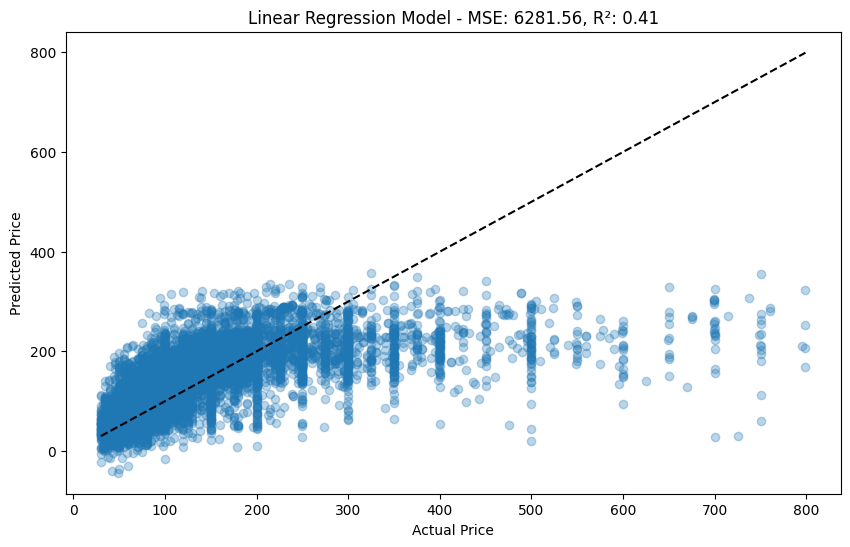

In [ ]:
import matplotlib.pyplot as plt

# Run this code after you've computed y_pred and y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.axis('tight')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression Model - MSE: {mse:.2f}, R²: {r2:.2f}')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Prepare transformers for preprocessing the data
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the data
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

X_transformed = preprocessor.fit_transform(X)

# Check the shape of the transformed data
X_transformed.shape


(43301, 235)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict the rental prices on the testing set using Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(5624.1204294452045, 0.4687034057504975)

1. Feature Importance Plot This plot shows which features contribute most to the model's predictions. A lack of significant features can indicate why a model might not be performing well.

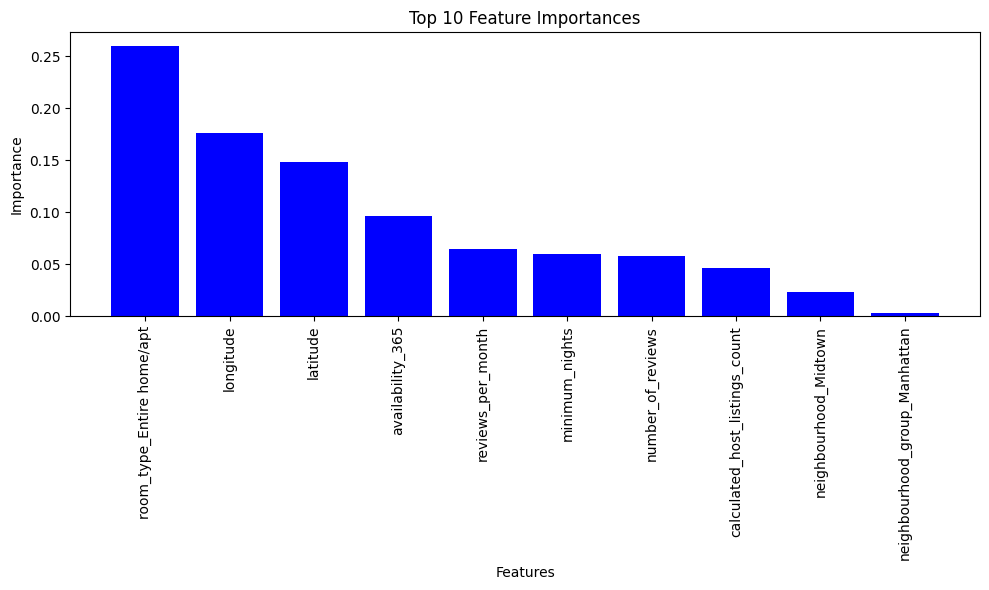

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already fitted the RandomForestRegressor and obtained the feature importances
importances = random_forest_model.feature_importances_

# Get feature names from OneHotEncoder and combine with numerical features
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)
feature_names = list(numerical_features) + list(feature_names_cat)

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(importances)[::-1]

# Limit to top 10 features
top_10_indices = sorted_indices[:10]

# Create the feature importance plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.bar(range(len(top_10_indices)), importances[top_10_indices], color='b', align='center')
plt.xticks(range(len(top_10_indices)), [feature_names[i] for i in top_10_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

2. A residuals plot can highlight the differences between actual and predicted values, revealing patterns that the model fails to capture.

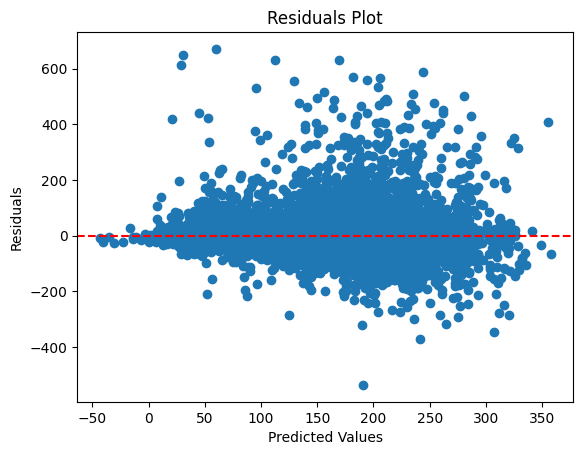

In [ ]:
# 2. Residuals Plot
# Assume 'y_true' are the true values and 'y_pred' are the predictions from your model
residuals = y_test - y_pred_rf

plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


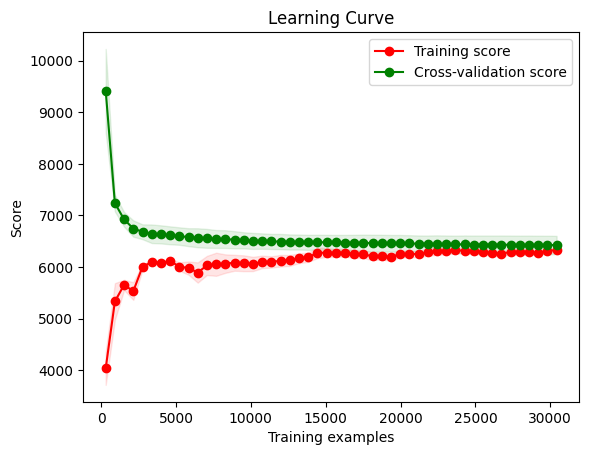

In [ ]:
#3. Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.01, 1.0, 50))

# Take the mean and standard deviation of the training and validation scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
validation_scores_std = validation_scores.std(axis=1)

# Plot learning curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Learning curves show how the model's error changes as the training set size increases, which can indicate whether collecting more data may improve the model.

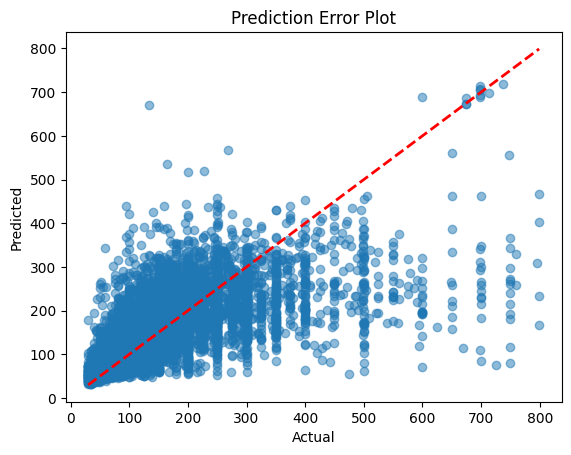

In [ ]:
#4. Prediction Error Plot
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error Plot')
plt.show()

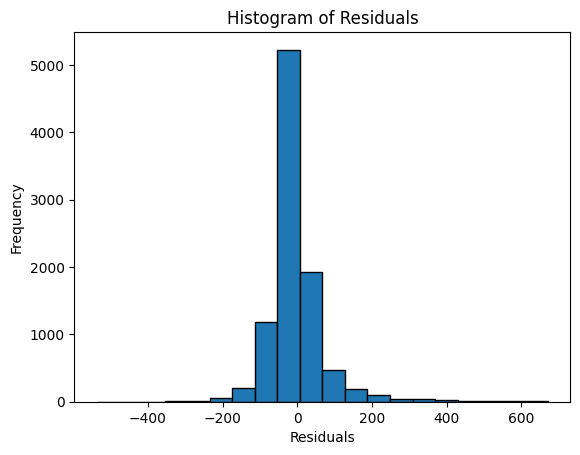

In [ ]:
#5. Residuals Histogram
residuals = y_test - y_pred_rf
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


This plot shows the actual values against the predicted values and is useful for regression tasks.

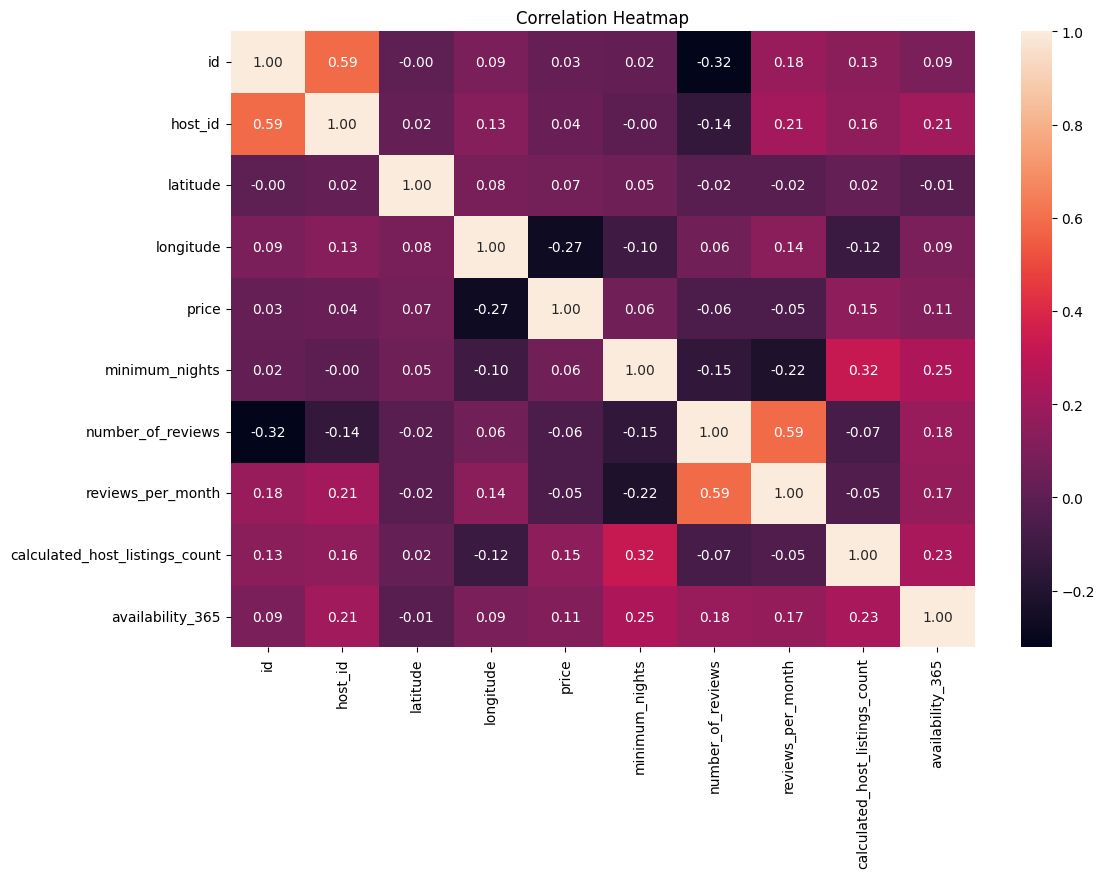

In [ ]:
#6 Correlation Heatmap
import seaborn as sns
# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Reduce the complexity of the Random Forest model to speed up training
random_forest_model_reduced = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
random_forest_model_reduced.fit(X_train, y_train)

# Predict the rental prices on the testing set using the reduced Random Forest model
y_pred_rf_reduced = random_forest_model_reduced.predict(X_test)

# Evaluate the reduced Random Forest model performance
mse_rf_reduced = mean_squared_error(y_test, y_pred_rf_reduced)
r2_rf_reduced = r2_score(y_test, y_pred_rf_reduced)

mse_rf_reduced, r2_rf_reduced


(5576.590502974027, 0.4731934390589694)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict the rental prices on the testing set using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb

(5707.3894933221, 0.46083718549452357)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score


Fitting 3 folds for each of 27 candidates, totalling 81 fits


({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150},
 0.4873754521668965)

In [ ]:
# Manually adjust the model with specific parameters
manual_gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
manual_gb_model.fit(X_train, y_train)

# Predict the rental prices on the testing set using the manually tuned model
y_pred_manual_gb = manual_gb_model.predict(X_test)

# Evaluate the manually tuned Gradient Boosting model
mse_manual_gb = mean_squared_error(y_test, y_pred_manual_gb)
r2_manual_gb = r2_score(y_test, y_pred_manual_gb)

mse_manual_gb, r2_manual_gb

(5707.3894933221, 0.46083718549452357)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load data
#data = pd.read_csv('/content/AB_NYC_2019.csv')

# Assuming 'name' is a column with text data that we want to drop
#X = data.drop(['price', 'name'], axis=1)
#y = data['price']

# Identify categorical columns (example: 'neighbourhood_group', 'room_type')
categorical_features = ['neighbourhood_group', 'room_type']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Full pipeline with model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(random_state=42))])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')


MSE: 5692.158578523026, R²: 0.4622760119317537


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'name' and 'host_name' are non-numeric text columns that we drop
X = df.drop(['price', 'name', 'host_name'], axis=1)
y = df['price']

# Define categorical and numerical columns
categorical_features = ['neighbourhood_group', 'room_type']  # example categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessing pipeline that includes OneHotEncoder for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Include Polynomial Features in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')

MSE: 5541.340002015362, R²: 0.47652346574311966


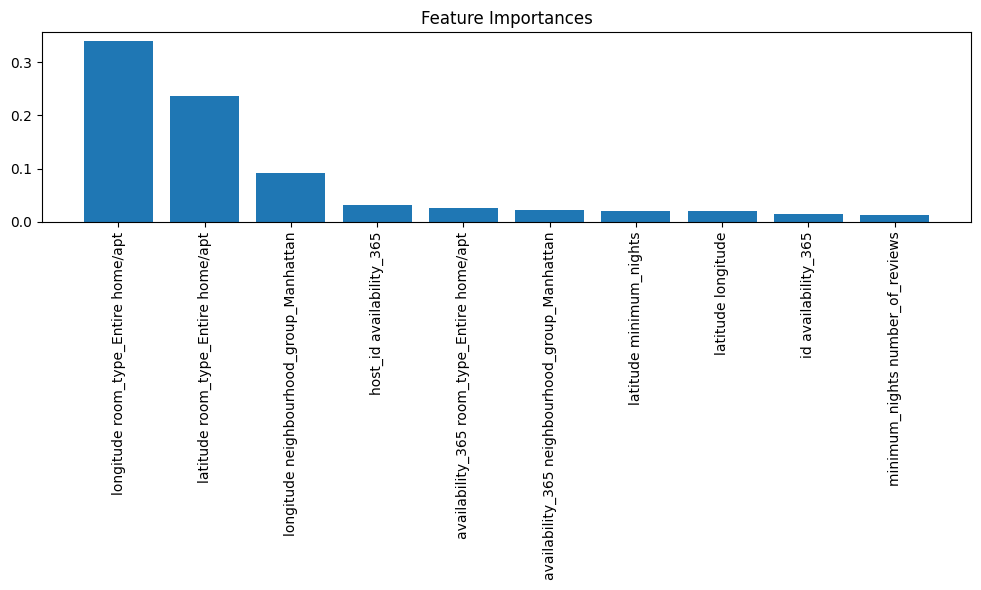

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importances from the regressor
feature_importances = pipeline.named_steps['regressor'].feature_importances_

# Get the feature names after one-hot encoding
feature_names = numerical_features + \
                list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())

# Combine with the feature names generated by PolynomialFeatures
feature_names_poly = pipeline.named_steps['poly'].get_feature_names_out(feature_names)

# Sort feature importances in descending order and get the indices
indices = np.argsort(feature_importances)[::-1]

# Limit to top 10 features
top_10_indices = indices[:10]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(top_10_indices)), feature_importances[top_10_indices], align='center')
plt.xticks(range(len(top_10_indices)), [feature_names_poly[i] for i in top_10_indices], rotation=90)
plt.tight_layout()
plt.show()


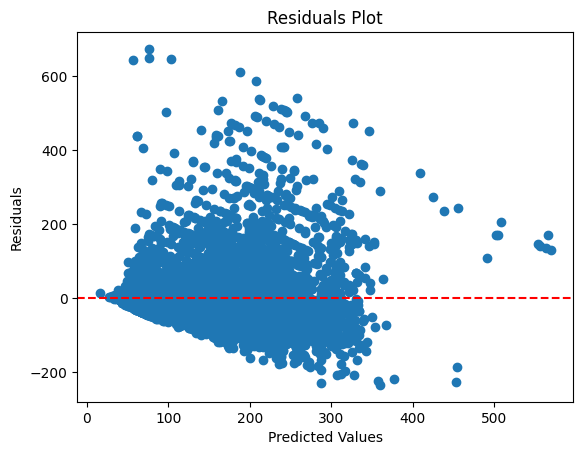

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [ ]:
 from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.xlabel('Training size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


KeyboardInterrupt: 

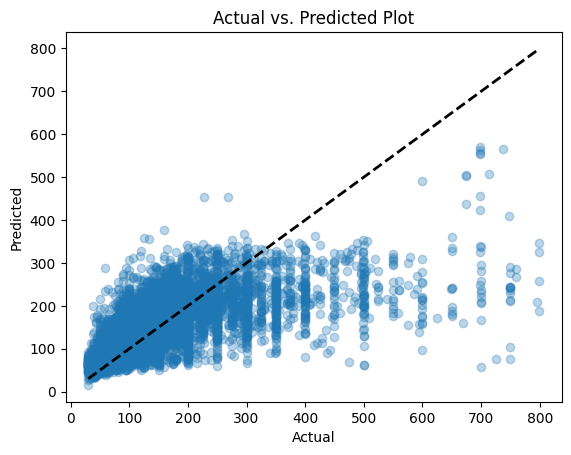

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot')
plt.show()


In [ ]:
#extend the hyperparameter tuning with a broader range of parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__subsample': [0.7, 0.9]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Best model evaluation
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Improved MSE: {mse_best}, Improved R²: {r2_best}')


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__max_features=sqrt, regressor__n_estimators=100, regressor__subsample=0.7; total time=   5.7s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__max_features=sqrt, regressor__n_estimators=100, regressor__subsample=0.7; total time=   4.6s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__max_features=sqrt, regressor__n_estimators=100, regressor__subsample=0.7; total time=   4.0s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__max_features=sqrt, regressor__n_estimators=100, regressor__subsample=0.9; total time=   5.8s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__max_features=sqrt, regressor__n_estimators=100, regressor__subsample=0.9; total time=   5.0s
[CV] END regressor__learning_rate=0.05, regressor__max_depth=3, regressor__max_features=sqrt, regre

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data: MSE and R2 values from different models
data = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "Improved GB", "Advanced GB","GridSearchCV"],
    "MSE": [6281.556536958027, 5576.590502974027, 5707.3894933221, 5692.158578523026, 5541.340002015362,5238.639461032996],
    "R2": [0.406597060546814, 0.4731934390589694, 0.46083718549452357, 0.4622760119317537, 0.47652346574311966,0.5051188289681703]
}
df = pd.DataFrame(data)


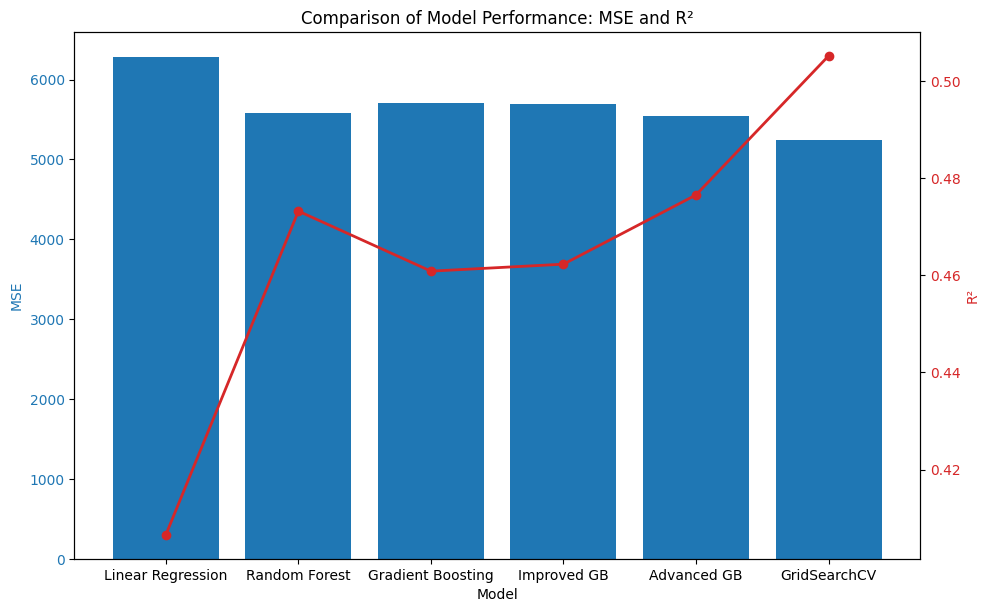

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for MSE
color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color=color)
ax1.bar(df['Model'], df['MSE'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin axis for the R2 values
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R²', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Model'], df['R2'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to ensure a nice layout
plt.title('Comparison of Model Performance: MSE and R²')
plt.show()


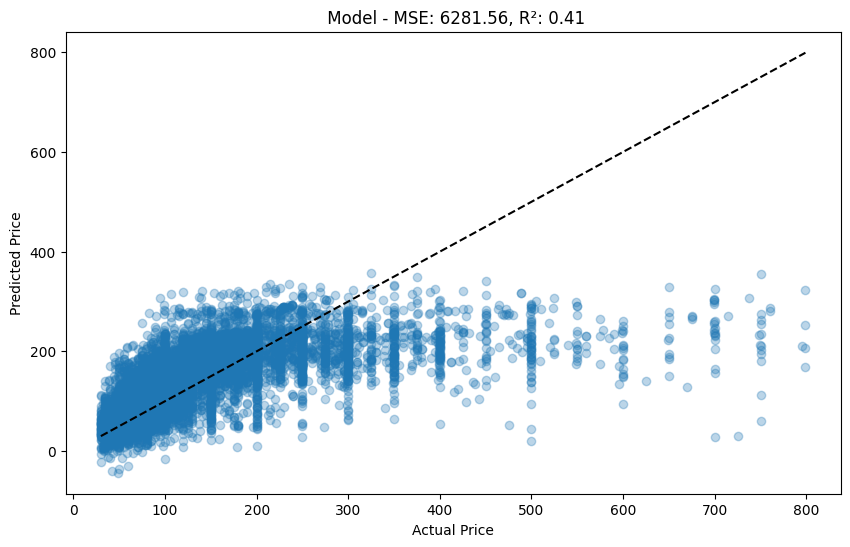

In [ ]:
import matplotlib.pyplot as plt

# Run this code after you've computed y_pred and y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.axis('tight')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f' Model - MSE: {mse:.2f}, R²: {r2:.2f}')
plt.show()
